In [201]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [202]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


notice that "TotalCharges" is object, so it may have nan values

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [204]:
df.shape

(7043, 21)

## Clean up the data

In [205]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [206]:
# one-hot encoding:
# categorical variables are converted into a form that could be provided to ML algorithms

columns = list(df)
catg_obj =[]
for attr in columns:
    if df[attr].dtype =='object':
        if attr != 'customerID':
            catg_obj.append(attr)

df = pd.get_dummies(df, columns = catg_obj, drop_first=True)
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


drop 'customerID' column

In [207]:
df.columns
df.drop(['customerID'], axis = 1, inplace = True)

drop nans

In [208]:
df.isna().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [209]:
df.dropna(inplace=True)
df.shape # drop 11 rows that has nan values

(7032, 31)

In [210]:
# df.info()

## Train Test split

In [211]:
from sklearn.model_selection import train_test_split

x = df.loc[:, df.columns != 'Churn_Yes']
y = df['Churn_Yes']
x_train, x_test, y_train, y_test = train_test_split(x, y) # default test_size = 0.25

See if data is balance or not 

In [212]:
sum_1 = sum(y_train==1)
sum_0 = sum(y_train==0)
print sum_1
print sum_0
print (sum_1/float(sum_0+sum_1)) # Percentage churn 

1393
3881
0.264125900645


### Use SMOTE Oversampling to balance data

In [213]:
from imblearn.over_sampling import SMOTE
smo = SMOTE()
x_train_, y_train_ = smo.fit_resample(x_train, y_train.ravel())

## Fitting multiple models using KFold

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

scoring = 'accuracy'
models = []
models.append(('LogR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
rslts = []
names = []
for name, model in models:
    kf = KFold(n_splits=10, random_state=None)
    scores = cross_val_score(model, x_train_, y_train_, cv=kfold, scoring=scoring)
    rslts.append(scores)
    names.append(name)
    print"%s: %f" % (name, scores.mean())

LogR: 0.752516
DT: 0.821719
RF: 0.860233


## Random Forest

In [221]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf = RandomForestClassifier()
rf.fit(x_train_, y_train_)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.767349260523


### Random Forest Confusion Matrix

In [216]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[991 291]
 [374 102]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1282
           1       0.26      0.21      0.23       476

   micro avg       0.62      0.62      0.62      1758
   macro avg       0.49      0.49      0.49      1758
weighted avg       0.60      0.62      0.61      1758



### Random Forest ROC Curve

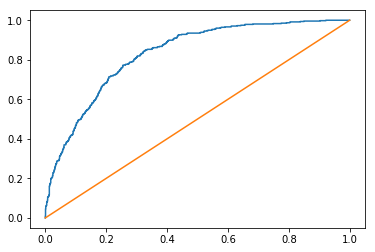

In [222]:
from sklearn import metrics

rf_pre_prob = rf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_pre_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

## Logistic Regression

In [223]:
lr = LogisticRegression()
lr.fit(x_train_, y_train_)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.740045506257


### Logistic Regression Confusion Matrix

In [224]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[926 356]
 [101 375]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1282
           1       0.51      0.79      0.62       476

   micro avg       0.74      0.74      0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.75      1758



### Logistic Regression ROC Curve

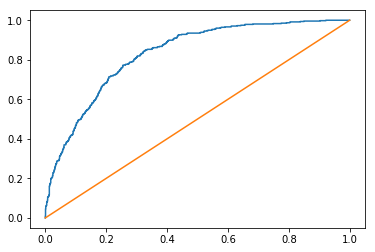

In [225]:
lr_pre_prob = lr.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_pre_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

## Using Cross validation to get a validation score

In [239]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, x_train_, y_train_, cv = 5)
print("Cross Validation Scores: " + str(scores))
print("Mean Cross Validation Score: " + str(scores.mean()))

# estimate generalization performance of the best model selection technique
# best_idx = scores.mean().index(max(scores.mean())) # because SKLearn flips MSE signs, max works OK here
# best_model = models[best_idx]

# clf_final = GridSearchCV(best_model, params[best_idx])
# clf_final.fit(X_train, y_train)

# y_pred = clf_final.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Cross Validation Scores: [ 0.66988417  0.74806701  0.92719072  0.92590206  0.94716495]
Mean Cross Validation Score: 0.84364178243


## Feature importances with forests of trees

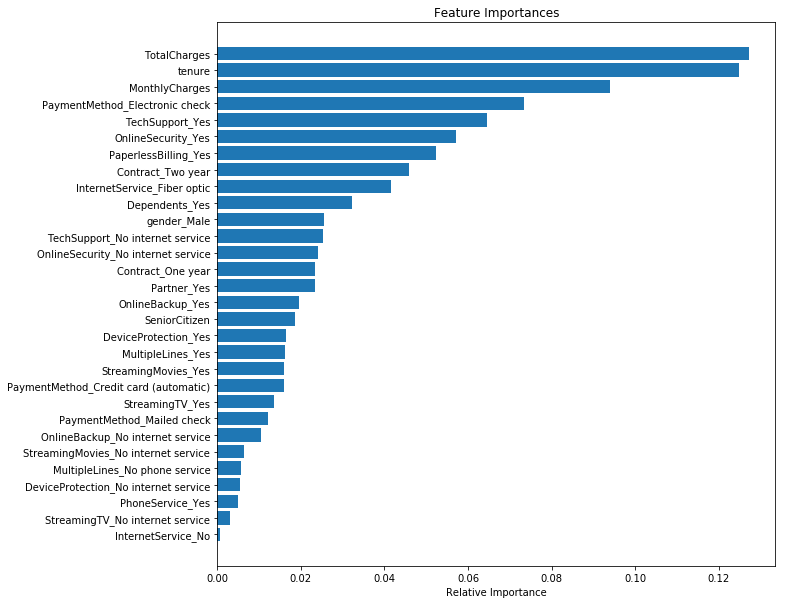

In [241]:
features = x_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [246]:
df.groupby(['Churn_Yes']).TotalCharges.describe()

,count,mean,std,min,25%,50%,75%,max
Churn_Yes,,,,,,,,
0,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


In [247]:
df.groupby(['TotalCharges']).Churn_Yes.describe()

,count,mean,std,min,25%,50%,75%,max
TotalCharges,,,,,,,,
18.80,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
18.85,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
18.90,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
19.00,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
19.05,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
19.10,3.0,0.333333,0.577350,0.0,0.00,0.0,0.50,1.0
19.15,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
19.20,4.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
19.25,3.0,0.333333,0.577350,0.0,0.00,0.0,0.50,1.0
